---
title: "Lab Project AYA"
author: "Safia safa-tahar-henni"
date: "January 28, 2019"

---

# AYA Project

Les donnees proviennent de plusieurs sources:
* Leucegene:
500 patients dont 80 AYA
donnees:  p-value analyse expression differentielle
non normalise 
analyse avec DeSeq2
* TGCA: ~ 200 adultes
* Target (https://ocg.cancer.gov/programs/target/projects/acute-myeloid-leukemia):
Les chercheurs de TARGET analysent les tumeurs de patients pediatriques, dont beaucoup ont fait une rechute, afin d'identifier des biomarqueurs en correlation avec de mauvais resultats cliniques et / ou de nouvelles approches therapeutiques pour traiter la LMA chez l'enfant. (200 patients)


But : Analyse expression differentielle, mettre en evidence des genes specifique aux Adolescents et jeunes Adultes (18-40 ans).



In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

In [2]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)


Attaching package: ‘plyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



## Repartition des echantillons selon leurs caracteristiques cliniques

In [3]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 
summary(t_data_API)


 Age_at_diagnosis LSC_frequency Overall_Survival_Status
 -      :129            : 15    -  :129                
 nan    : 41      -     :129    0  :114                
 65     : 22      High  : 10    1  :338                
 56     : 16      Low   : 23    nan: 41                
 58     : 15      Medium: 21                           
 68     : 14      nan   :424                           
 (Other):385                                           
                                                                                                    Subgroup  
 Normal karyotype                                                                                       :248  
 Intermediate abnormal karyotype (except isolated trisomy/tetrasomy 8)                                  : 88  
 Complex (3 and more chromosomal abnormalities)                                                         : 72  
 MLL translocations (+MLL FISH positive) (Irrespective of additional cytogenetic abnormalities)         : 37

### Cytogenetic risk

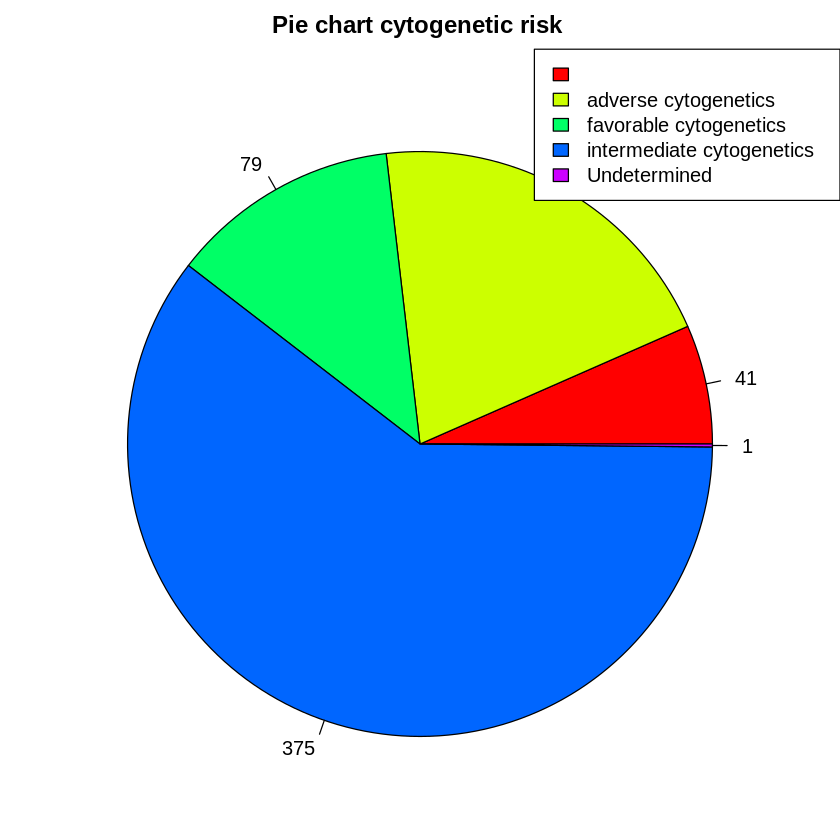

In [5]:

# count table
count_cytogenetic_risk = count(t_data_API,"cytogenetic_risk " )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart cytogenetic risk ",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
legend("topright",legend = count_cytogenetic_risk$cytogenetic_risk, cex = 1,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)


### Cytogenetic subgroup

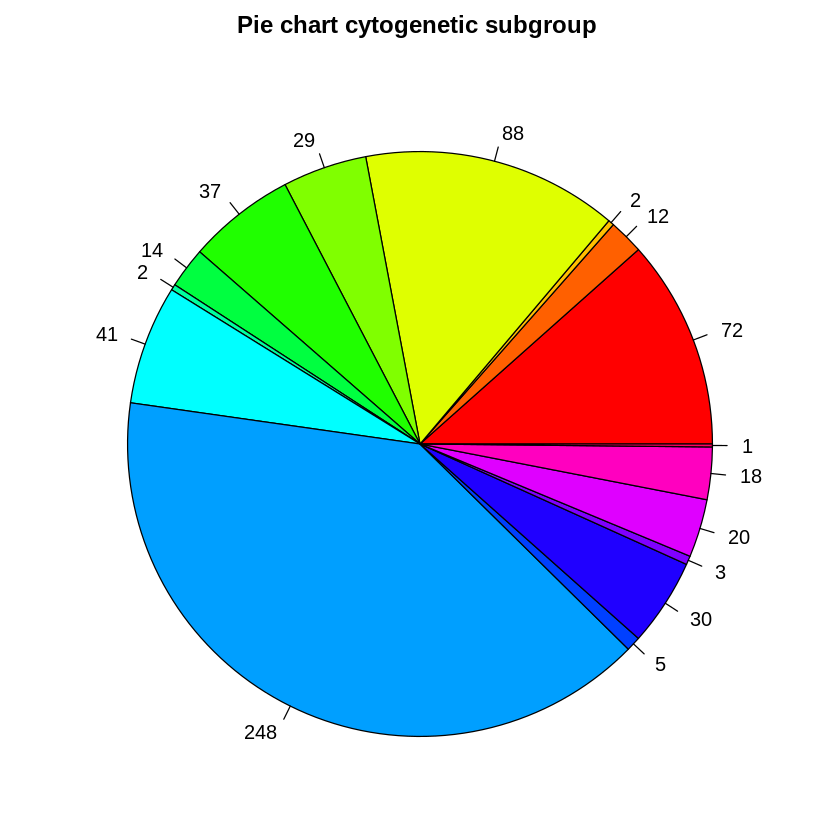

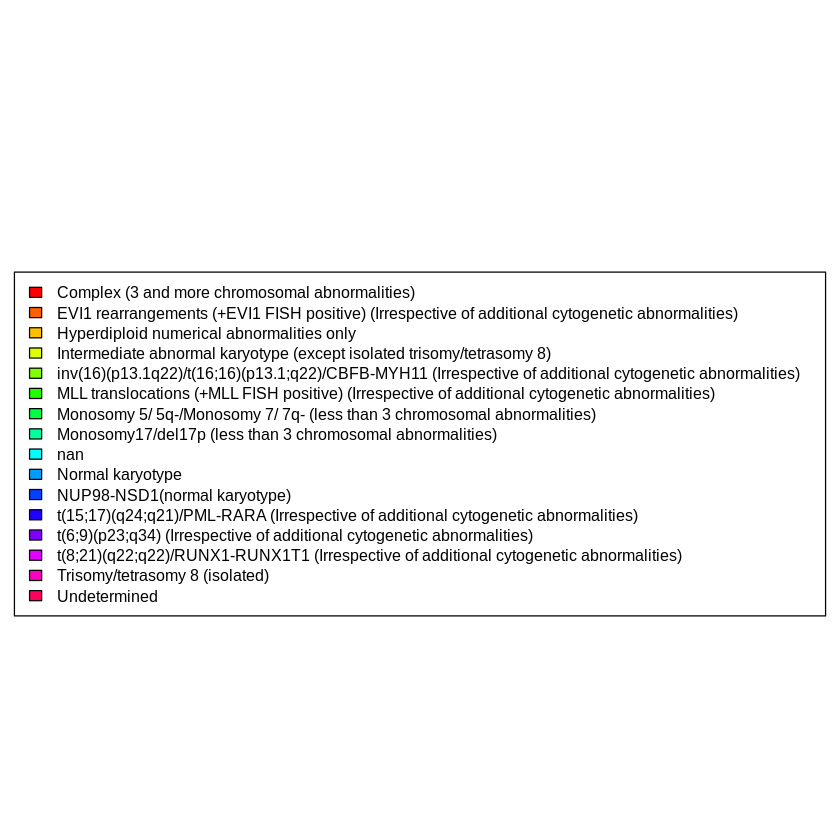

In [5]:
# count table
count_cytogenetic_subgroup = count(t_data_API, "cytogenetic_subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_subgroup$freq, main = "Pie chart cytogenetic subgroup ",labels = count_cytogenetic_subgroup$freq, col = rainbow(length(count_cytogenetic_subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_cytogenetic_subgroup$cytogenetic_subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_cytogenetic_subgroup$freq)),xpd=NA)


### Subgroup

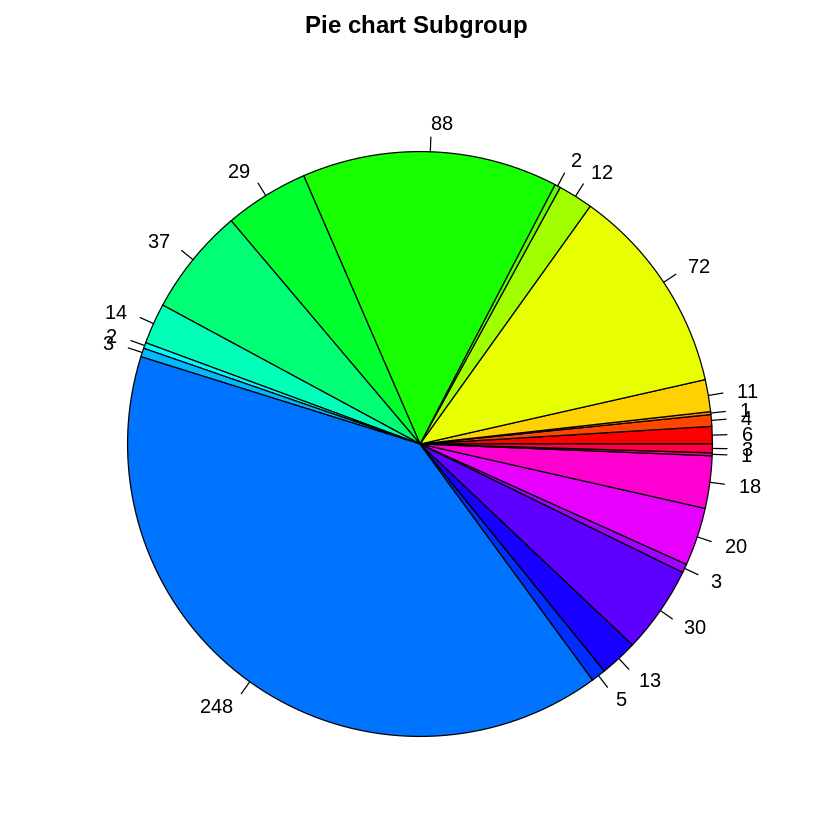

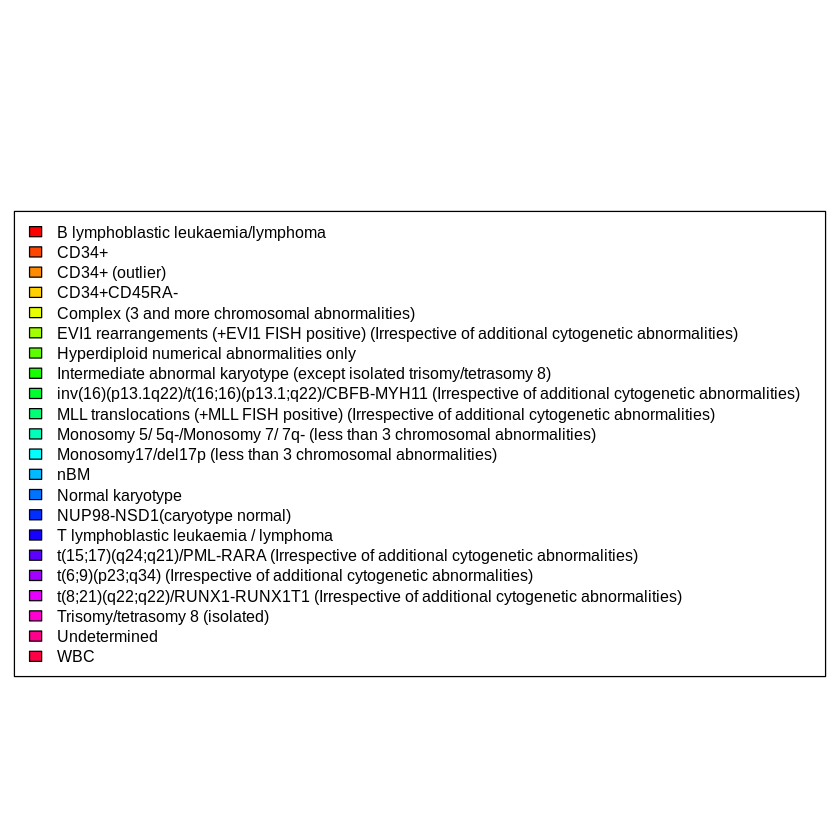

In [6]:
# count table
count_Subgroup = count(t_data_API, "Subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Subgroup$freq, main = "Pie chart Subgroup ",labels = count_Subgroup$freq, col = rainbow(length(count_Subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_Subgroup$Subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Subgroup$freq)),xpd=NA)

### WHO 2008

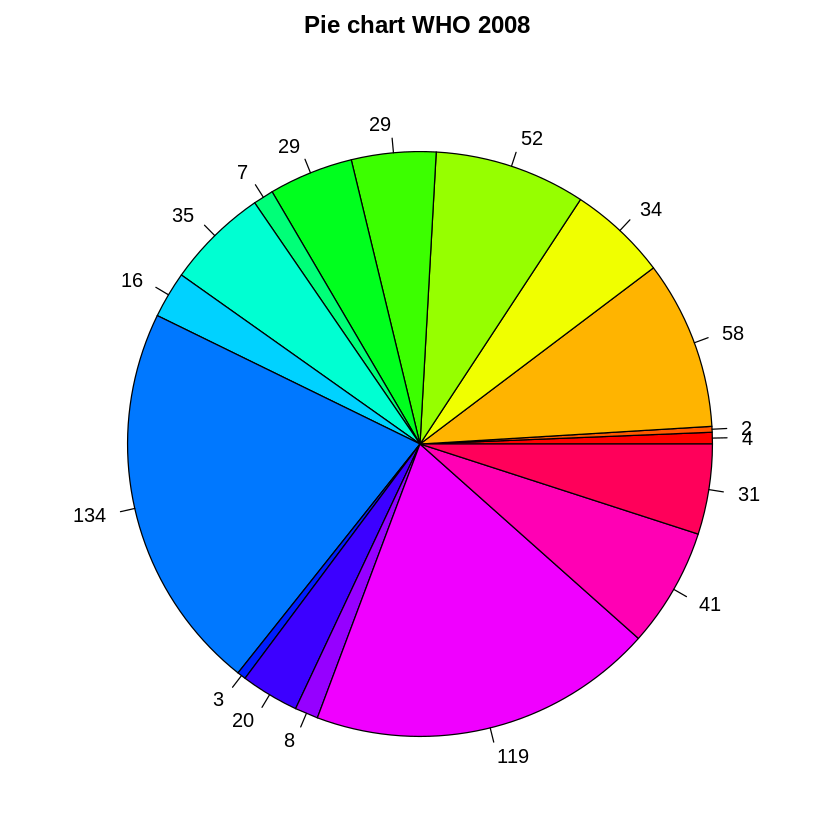

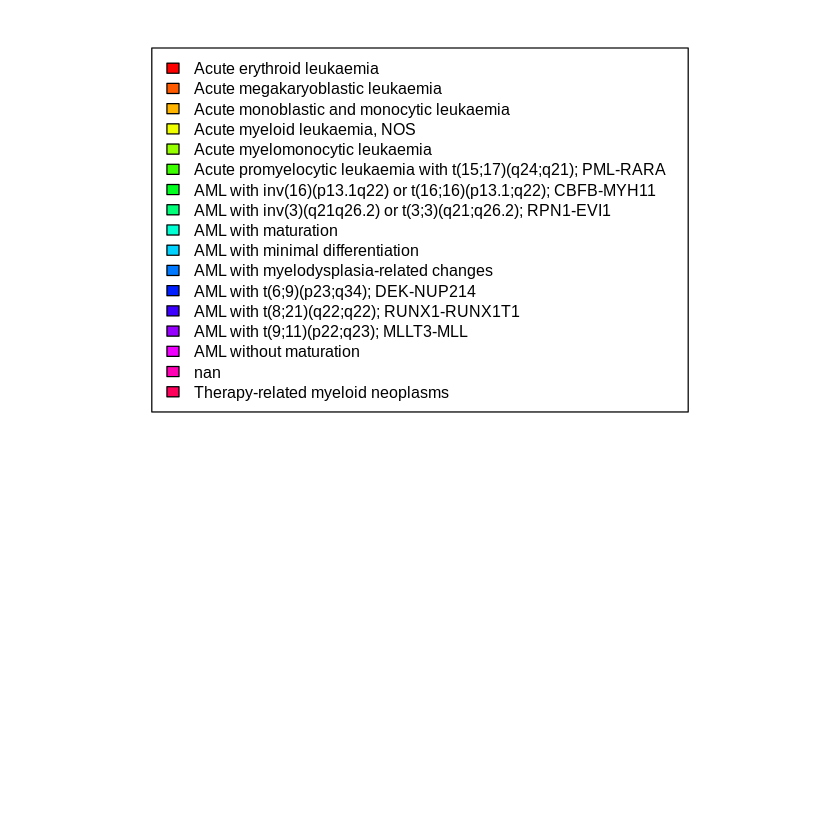

In [7]:
# count table
count_Who = count(t_data_API, "WHO_2008")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Who$freq, main = "Pie chart WHO 2008 ",labels = count_Who$freq, col = rainbow(length(count_Who$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_Who$WHO_2008, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Who$freq)),xpd=NA)


### FAB

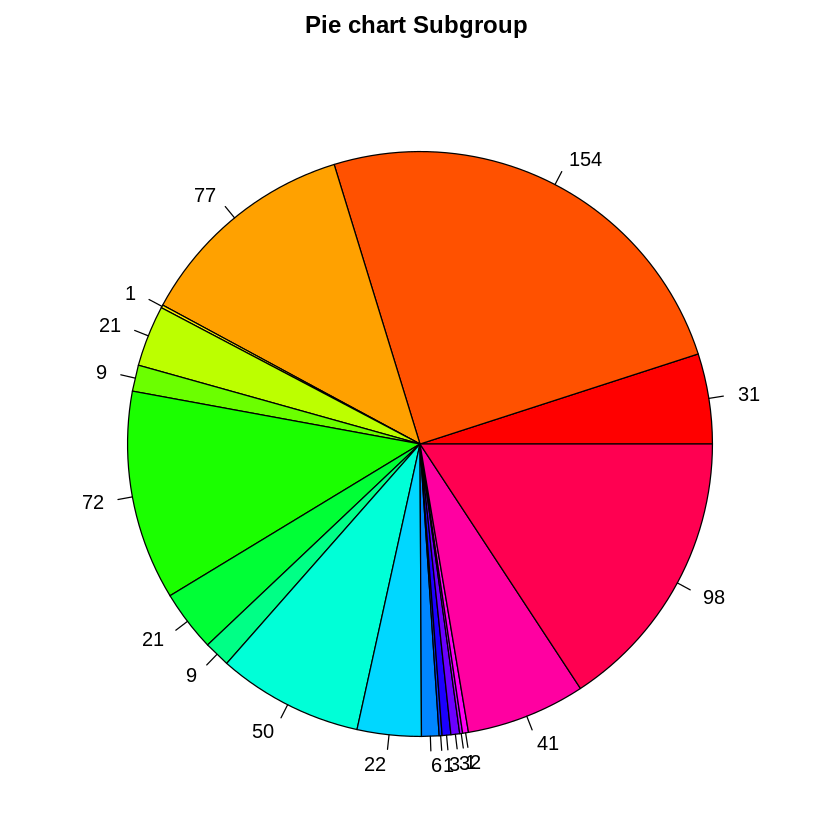

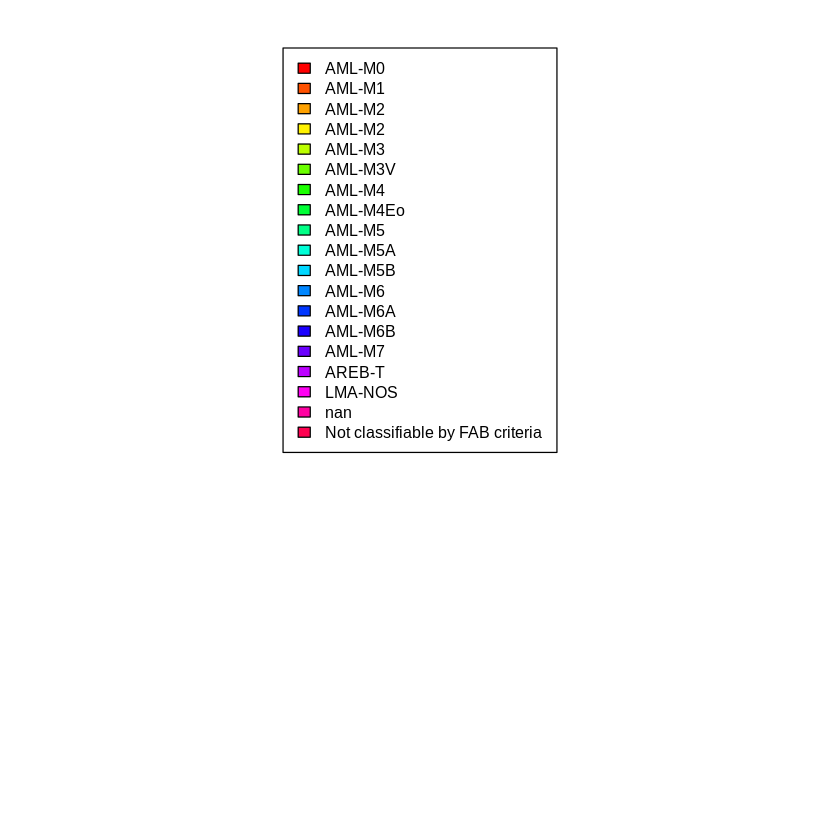

In [8]:
# count table
count_FAB = count(t_data_API, "dx_FAB")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_FAB$freq, main = "Pie chart Subgroup ",labels = count_FAB$freq, col = rainbow(length(count_FAB$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_FAB$dx_FAB, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_FAB$freq)),xpd=NA)


## % Blast

[1] 402

Warning message in hist(as.numeric(unfactor(t_data_API$`blasts_(%)`)), xlab = "blast (%)", :
“NAs introduced by coercion”

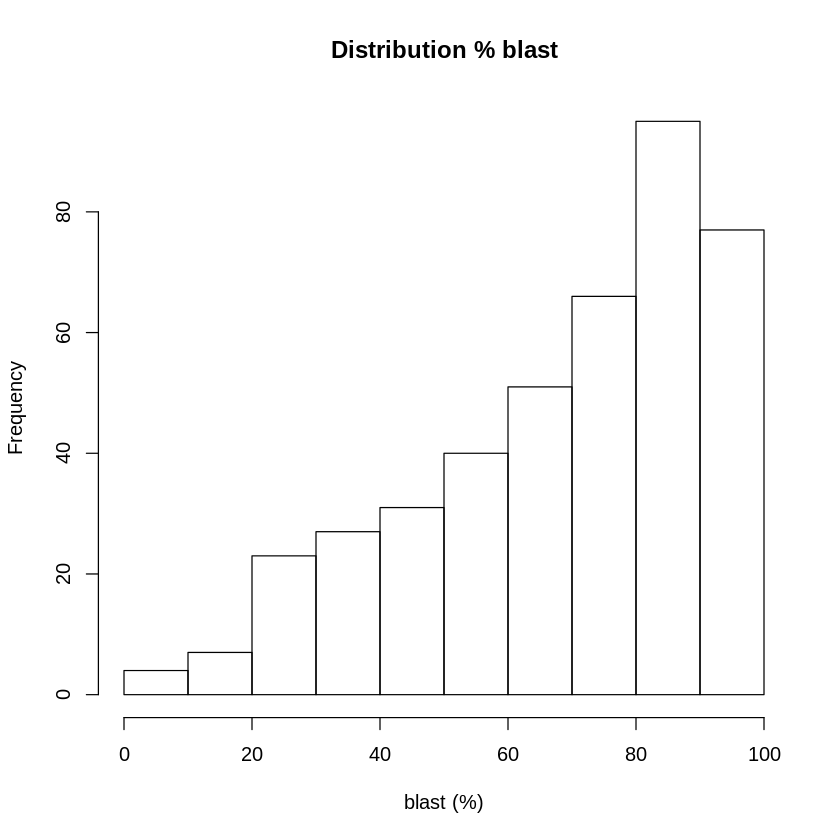

In [9]:
blast_sup_50 = row.names(t_data_API[which(unfactor(t_data_API$`blasts_(%)`)>50),])
#blast_sup_50 # Individus sequence avec un pourcentage de blast > 50 %
length(blast_sup_50) # Nombre d'individus sequence avec un pourcentage de blast > 50 %
hist(as.numeric(unfactor(t_data_API$`blasts_(%)`)),xlab = "blast (%)", main = "Distribution % blast")


## Analyse expression differentielle a partir des read count

In [20]:
adverse = row.names(t_data_API[which(unfactor(t_data_API$cytogenetic_risk)=="adverse cytogenetics"),])

intermediate = row.names(t_data_API[which(unfactor(t_data_API$cytogenetic_risk)=="intermediate cytogenetics"),])

favorable = row.names(t_data_API[which(unfactor(t_data_API$cytogenetic_risk)=="favorable cytogenetics"),])


In [21]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [22]:
adverse = substring(adverse,2)
count_adverse = read_count[,adverse]

colnames(count_adverse) = paste("Adv", colnames(count_adverse), sep = "_")


In [23]:
intermediate = substring(intermediate,2)
count_intermediate = read_count[,intermediate]

colnames(count_intermediate) = paste("Int", colnames(count_intermediate), sep = "_")


In [24]:
favorable = substring(favorable,2)
count_favorable = read_count[,favorable]

colnames(count_favorable) = paste("Fav", colnames(count_favorable), sep = "_")


In [25]:
df = cbind(count_adverse,count_intermediate,count_favorable)

df_AI = cbind(count_adverse,count_intermediate)
df_AF = cbind(count_adverse,count_favorable)
df_IF = cbind(count_intermediate,count_favorable)

In [26]:
samples <- data.frame(groups = substr(colnames(df), 1, 3))

samples_AI <- data.frame(groups = substr(colnames(df_AI), 1, 3))
samples_AF <- data.frame(groups = substr(colnames(df_AF), 1, 3))
samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))

"base mean" (an average of the normalized mean counts per group), 
the log2 fold change between the groups, and the 
P-values (both "raw" and adjusted for multiple comparisons)

In [27]:
ds <- DESeqDataSetFromMatrix(countData=df, colData=samples, design=~groups)
colnames(ds) <- colnames(counts)
ds <-DESeq(ds)
res <- results(ds)
head(res)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 4393 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups Int vs Adv 
Wald test p-value: groups Int vs Adv 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange              lfcSE
                          <numeric>          <numeric>          <numeric>
ENSG00000223972.5  6.09002764659604  -1.13190128619525   0.15486393505103
ENSG00000227232.5  285.351198943538  0.315300765503667 0.0616992142422079
ENSG00000278267.1  18.6248463910603 -0.229546947611584 0.0811231362113446
ENSG00000243485.3  11.2409443348087 -0.365607657686481  0.127866819251648
ENSG00000274890.1                 0                 NA                 NA
ENSG00000237613.2 0.101221523341385 -0.376046459986776  0.827979258023824
                                stat               pvalue                 padj
                           <numeric>            <numeric>            <numeric>
ENSG00000223972.5   -7.3090050683671 2.69127619862591e-13 1.12182797183566e-11
ENSG00000227232.5   5.11028818399396 3.21667769040262e

In [ ]:
library("tidyr")

In [18]:
res <- results(ds, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
res

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds)))
goi

tcounts <- t(log2((counts(ds[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

tcounts %>% 
  select(Row.names, groups, gene, expression) %>% 
  head %>% 
  knitr::kable()




ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


ERROR: Error in tbl_df(.): could not find function "tbl_df"


In [ ]:
ds_AI <- DESeqDataSetFromMatrix(countData=df_AI, colData=samples_AI, design=~groups)
colnames(ds_AI) <- colnames(counts)
ds_AI <-DESeq(ds_AI)
res_AI <- results(ds_AI)
head(res_AI)

In [ ]:
ds_AF<- DESeqDataSetFromMatrix(countData=df_AF, colData=samples_AF, design=~groups)
colnames(ds_AF) <- colnames(counts)
ds_AF <-DESeq(ds_AF)
res_AF <- results(ds_AF)
head(res_AF)

In [ ]:
ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)
head(res_IF)

In [ ]:
write.table(res, "res_DE_AFI.xls", sep="\t") 
write.table(res_AI, "res_DE_AI.xls", sep="\t") 
write.table(res_AF, "res_DE_AF.xls", sep="\t") 
write.table(res_IF, "res_DE_FI.xls", sep="\t") 


#### Diagramm Venn

In [6]:
res_AI = read.table("/home/safia/Documents/AYA_analysis/res_DE_AI.xls", sep="\t")

res_AF = read.table("/home/safia/Documents/AYA_analysis/res_DE_AF.xls", sep="\t")

res_FI = read.table("/home/safia/Documents/AYA_analysis/res_DE_FI.xls", sep="\t")

res_AFI = read.table("/home/safia/Documents/AYA_analysis/res_DE_AFI.xls", sep="\t")

In [28]:
counts.sf_normalized  <- counts(ds, normalized = TRUE)
log.norm.counts  <- log2(counts.sf_normalized + 1)

Heatmaps ofrlog-transformed read counts for genes with adjustedp-values <0.05 in the DGE analysis.a) Genes sorted according to the adjustedp-values of the DGE analysis. b) Genes sorted according to hierarchicalclustering. c) Same as for (b), but the read count values are scaled per row so that the colors actually representz-scores rather than the underlying read counts

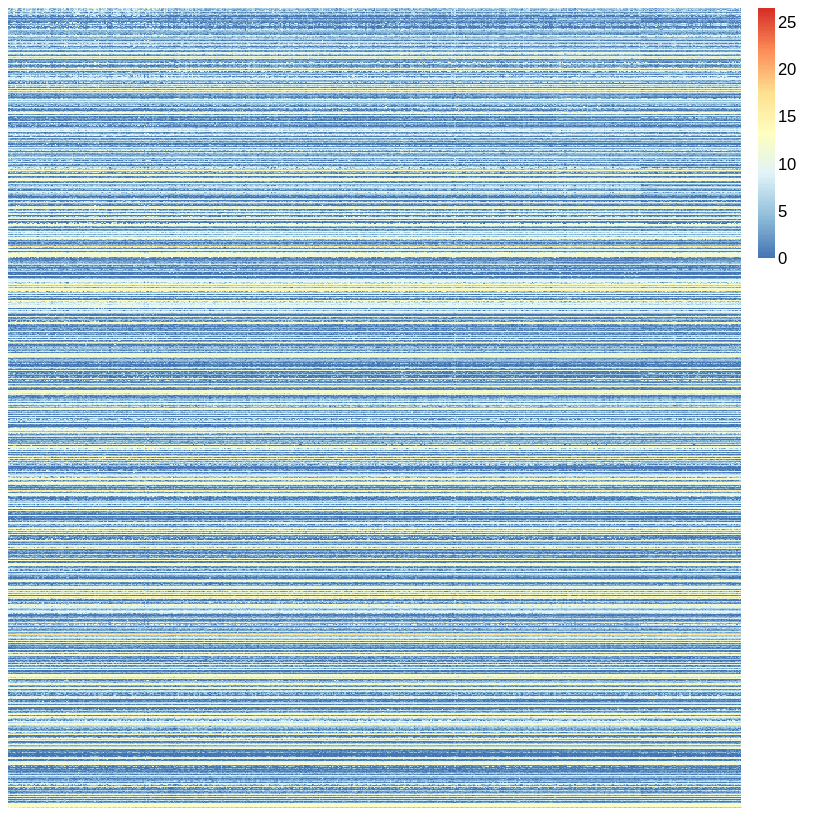

In [29]:
library(NMF)
DGE.results.sorted  <- res_AFI[order(res_AFI$padj), ]
DGEgenes  <- rownames(subset(DGE.results.sorted , padj < 0.05))


hm.mat_DGEgenes  <- log.norm.counts[DGEgenes , ]
aheatmap(hm.mat_DGEgenes , Rowv = NA, Colv = NA)

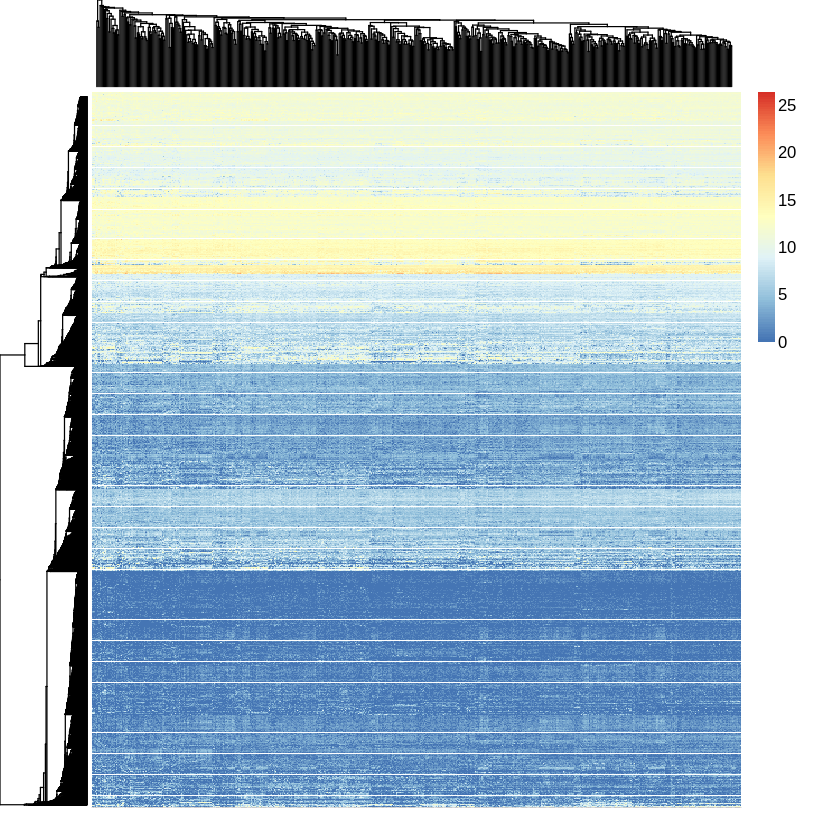

In [55]:
aheatmap(hm.mat_DGEgenes ,
         Rowv = TRUE , Colv = TRUE , # add  dendrograms  to rows  and  columns
         distfun = "euclidean", hclustfun = "average")

In [ ]:
# scale  the  read  counts  per  gene to  emphasize  the  sample -type -specific differences Z-score
aheatmap(hm.mat_DGEgenes ,
         Rowv = TRUE , Colv = TRUE ,
         distfun = "euclidean", hclustfun = "average",
         scale = "row") # values  are  transformed  into  distances  from  the  centerof the row -specific  average: (actual  value - mean of the  group) /standard  deviation

In [ ]:
THRESHOLD <- 0.05
res_AI.sig <- subset(res_AI, padj<THRESHOLD) 
res_AF.sig <- subset(res_AF, padj<THRESHOLD)  
res_FI.sig <- subset(res_FI, padj<THRESHOLD) 
res_AFI.sig <- subset(res_AFI, padj<THRESHOLD)



In [ ]:
print(length(rownames(res_AI.sig)))
print(length(rownames(res_AF.sig)))
print(length(rownames(res_FI.sig)))
print(length(rownames(res_AFI.sig)))

In [ ]:
library(VennDiagram)

venn.plot <- venn.diagram(list(rownames(res_AI.sig), rownames(res_AF.sig), rownames(res_FI.sig), rownames(res_AFI.sig)), NULL, fill=c("red", "green","blue","yellow"), alpha=c(0.5,0.5,0.5,0.5), cex = 2, cat.fontface=4, category.names=c("Adverse vs Intermediate", "Adverse vs Favorable","Favorable vs Intermediate","Adverse vs Favorable vs Intermediate"))
grid.draw(venn.plot)


### SOUS GROUPE ADVERSE

In [56]:
adverse = row.names(t_data_API[which(unfactor(t_data_API$cytogenetic_risk)=="adverse cytogenetics"),])

In [57]:
API_Adv = t_data_API[adverse,]

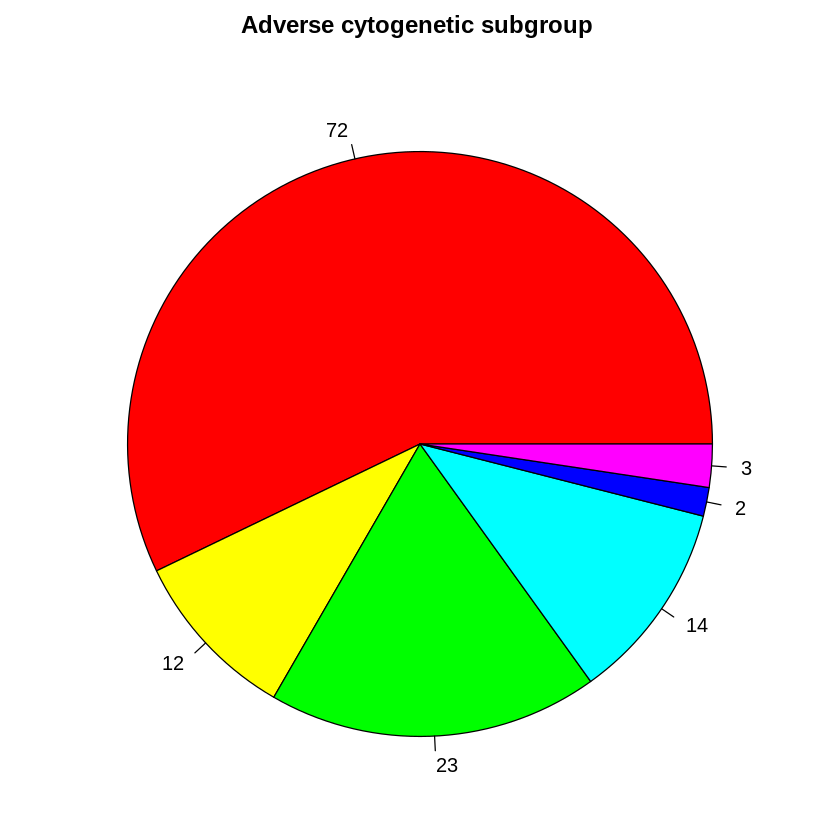

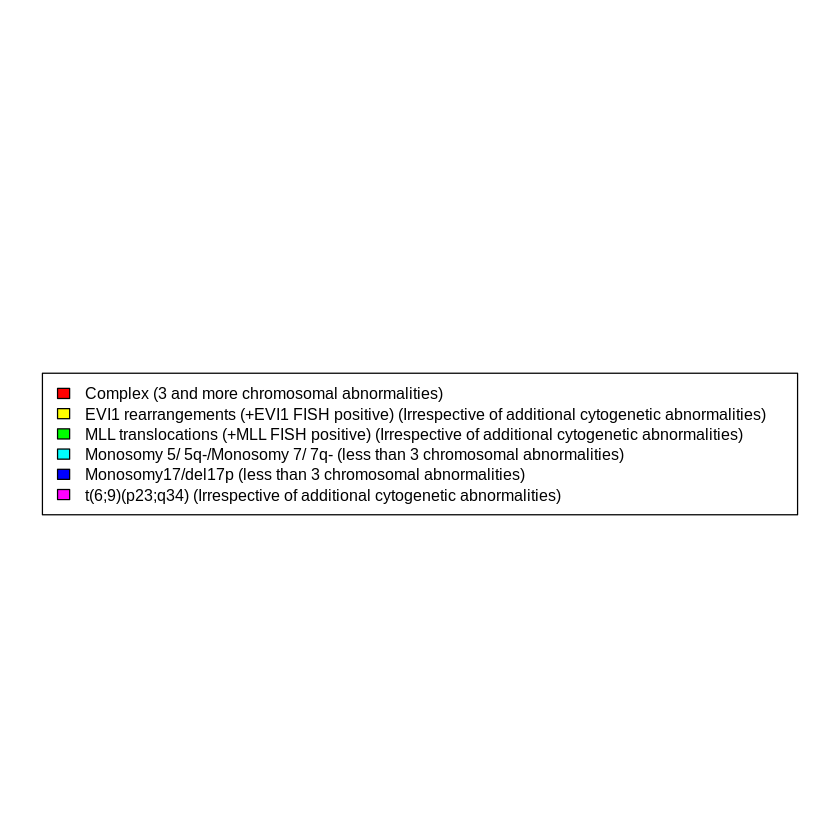

In [58]:
# count table
count_Adv_subgroup = count(API_Adv, "cytogenetic_subgroup")

# Pie chart

par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Adv_subgroup$freq, main = "Adverse cytogenetic subgroup ",labels = count_Adv_subgroup$freq, col = rainbow(length(count_Adv_subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_Adv_subgroup$cytogenetic_subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Adv_subgroup$freq)),xpd=NA)



In [91]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

m5_m7 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[4]),])

m17 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[5]),])

t6_9 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[6]),])

### Classification groupe complexe

In [60]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [61]:
complex = substring(complex,2)
count_complex = read_count[,complex]


In [62]:
cohort_IQR = apply(count_complex,1,IQR)

In [63]:
rank_cohort_IQR = rank(cohort_IQR)

In [64]:
ordered_IQR=rank_cohort_IQR[order(-rank_cohort_IQR)]

In [65]:
ordered_data=count_complex[order(-rank_cohort_IQR),]

In [66]:
tordered_data=t(ordered_data)


In [67]:
sample_dist=dist(tordered_data[,c(1:500)], method = "euclidean")

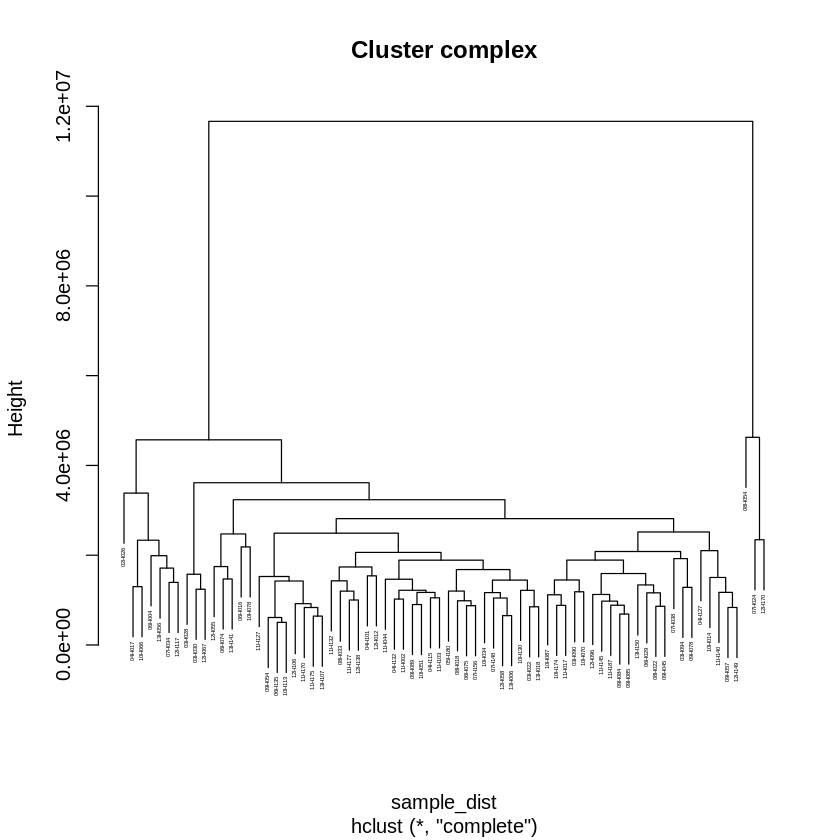

In [68]:
hc=hclust(sample_dist, method = "complete", members = NULL)

plot(hc, cex=0.3, main = "Cluster complex")

### information mutation p53

In [69]:
tp53_mutations = read.table("/home/safia/Documents/AYA/tp53_mutations.txt", header = T, sep="\t")

In [70]:
tp53 = colnames(tp53_mutations[2:171])
tp53 = substring(tp53,2)


In [78]:
tp53

[1] "01H002" "02H017" "02H025" "02H026" "02H046" "02H053" "02H060" "03H024"
  [9] "03H033" "03H052" "03H065" "03H067" "03H090" "03H116" "04H001" "04H006"
 [17] "04H041" "04H061" "04H078" "04H091" "04H103" "04H112" "04H115" "04H117"
 [25] "04H120" "04H121" "04H133" "05H031" "05H034" "05H042" "05H065" "05H066"
 [33] "05H094" "05H099" "05H136" "05H143" "05H195" "06H021" "06H026" "06H029"
 [41] "06H038" "06H045" "06H048" "06H074" "06H088" "06H089" "06H106" "06H133"
 [49] "06H144" "06H146" "06H151" "07H005" "07H024" "07H034" "07H041" "07H043"
 [57] "07H045" "07H055" "07H098" "07H107" "07H117" "07H134" "07H137" "07H148"
 [65] "07H152" "07H155" "07H160" "08H004" "08H022" "08H048" "08H054" "08H072"
 [73] "08H085" "08H088" "08H099" "08H112" "08H113" "08H118" "08H129" "08H138"
 [81] "09H008" "09H013" "09H018" "09H024" "09H026" "09H040" "09H042" "09H046"
 [89] "09H054" "09H057" "09H060" "09H062" "09H088" "09H089" "09H092" "09H094"
 [97] "09H098" "09H102" "09H113" "10H001" "10H005" "10H022" "10H031" "10H040"
[105] "10H046" "10H053" "10H070" "10H078" "10H089" "10H095" "10H106" "10H115"
[113] "10H119" "10H130" "10H149" "10H166" "11H006" "11H008" "11H014" "11H017"
[121] "11H021" "11H126" "11H140" "11H142" "11H151" "11H179" "11H183" "11H186"
[129] "11H187" "11H192" "11H217" "11H231" "11H234" "11H240" "12H010" "12H033"
[137] "12H044" "12H055" "12H079" "12H091" "12H096" "12H116" "12H124" "12H139"
[145] "12H165" "12H170" "12H171" "12H172" "12H173" "12H180" "12H195" "13H009"
[153] "13H019" "13H039" "13H056" "13H066" "13H080" "13H100" "13H104" "13H114"
[161] "13H140" "13H141" "13H185" "13H186" "14H015" "14H017" "14H019" "14H023"
[169] "14H027" "14H031"

In [72]:
#count_tp53 = read_count[,tp53]

In [73]:
#tp53_complex = cbind(count_complex,count_tp53)
cohort_IQR = apply(count_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)

ordered_data=count_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)


In [74]:
sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
sample_dist_1000=dist(tordered_data[,c(1:1000)], method = "euclidean")
hc_1000=hclust(sample_dist_1000, method = "complete", members = NULL)

In [75]:
#install.packages("dendextend")
library(dendextend)

In [82]:
dend <- as.dendrogram(hc_500)
dend1 <- as.dendrogram(hc_1000)
# Here is a second way for doing the same thing:
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% tp53, 2, 1)) 
dend3 <- color_labels(dend1, col = ifelse(labels(hc_1000) %in% tp53, 2, 1)) 

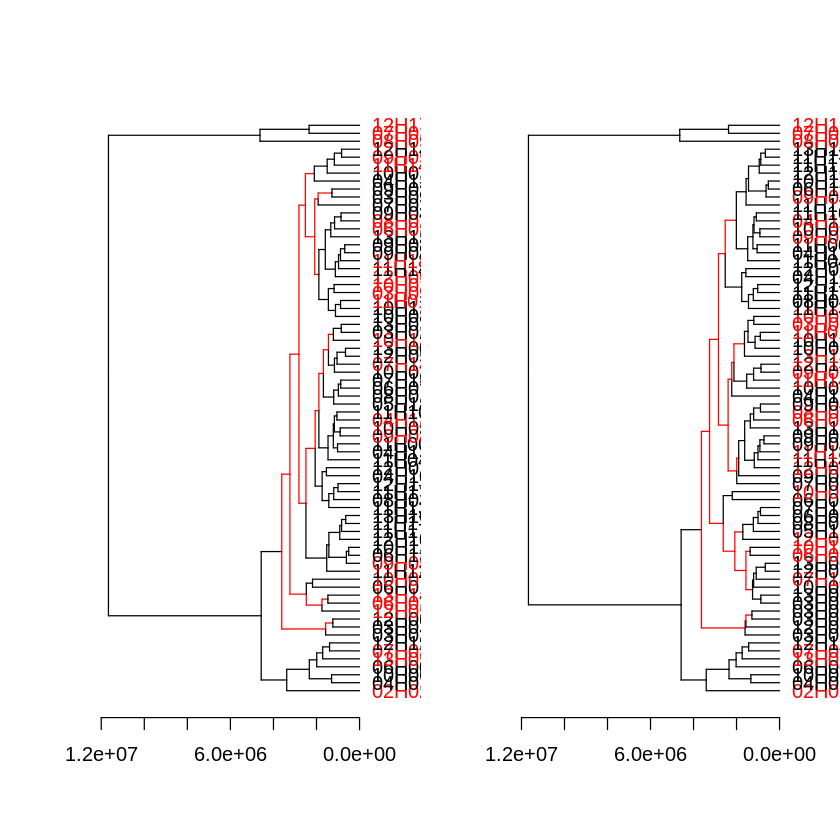

In [83]:
dend_diff(dend2, dend3)

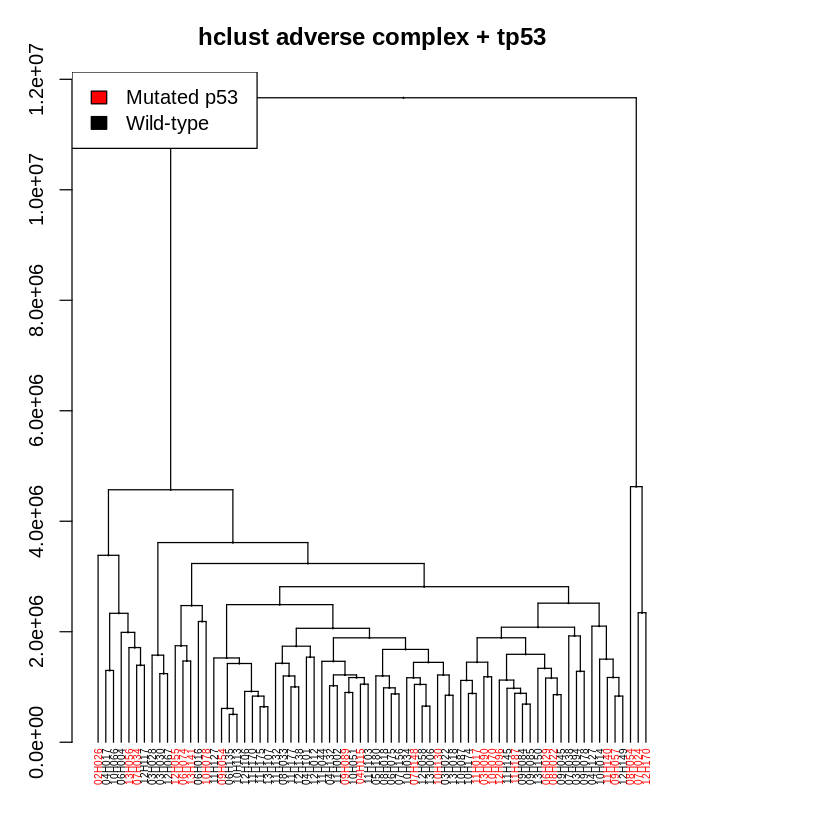

In [84]:

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + tp53", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("Mutated p53","Wild-type"), fill = c("red","black"))

### complex + 5 MLL

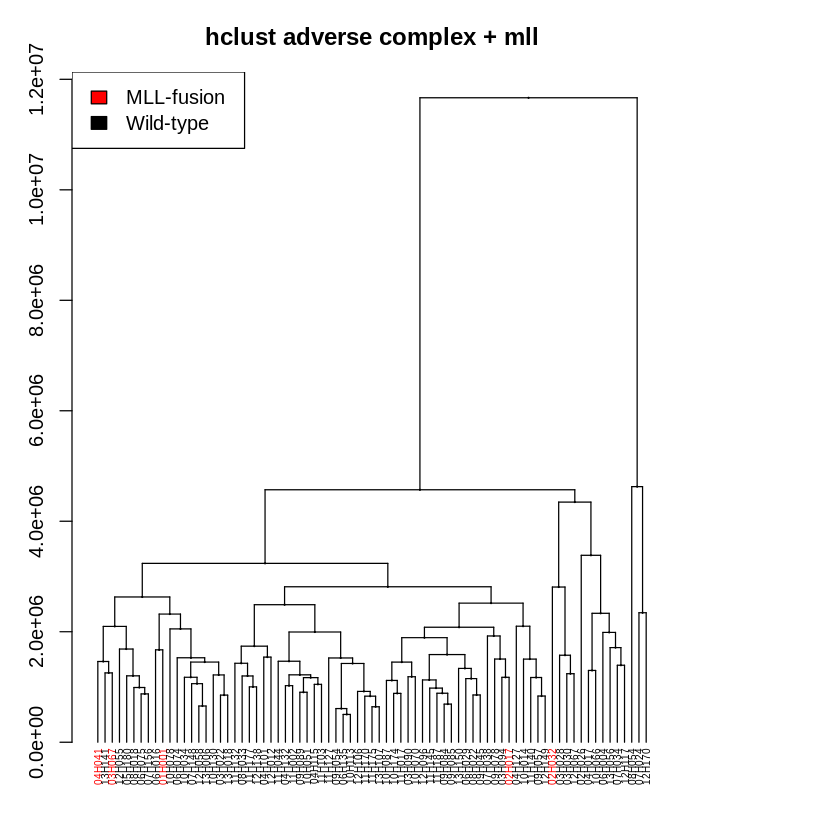

In [92]:
mll = substring(mll,2)
count_mll = read_count[,mll[1:5]]
mll_complex = cbind(count_complex,count_mll)
cohort_IQR = apply(mll_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)

ordered_data=mll_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)
sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)


dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll, 2, 1)) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("MLL-fusion","Wild-type"), fill = c("red","black"))

### Complex + 5 MLL + tp53

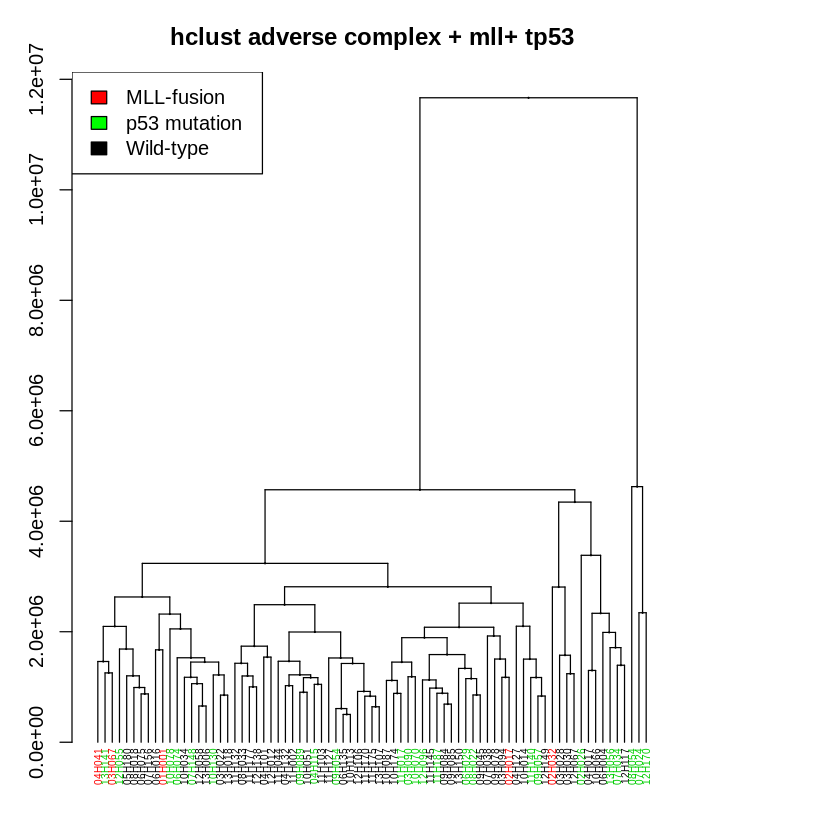

In [89]:
# Here is a second way for doing the same thing:
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll , 2 , ifelse(labels(hc_500) %in% tp53, 3, 1))) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll+ tp53", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("MLL-fusion","p53 mutation","Wild-type"), fill = c("red","green","black"))

#### Other mutation

In [ ]:
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_db7114.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]
library(dplyr)
df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                 genes=character(),
                 stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
  }

test = test[!duplicated(test), ]
test = na.omit(test)
library(plyr)
table_genes = count(test, "genes")

write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/db7114/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")


test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/db7114/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


##############
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_185701.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]

df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                   genes=character(),
                   stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
}

test = test[!duplicated(test), ]
test = na.omit(test)

table_genes = count(test, "genes")



write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/1857701/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")

test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/1857701/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


In [123]:
files = list.files(path = "/home/safia/Documents/AYA/RE__info/1857701/", pattern = "*.csv")
pdf("/home/safia/Documents/AYA/RE__info/test.p")
for (ele in files[1:2]){
    nbpf1_mutations = read.table(paste("/home/safia/Documents/AYA/RE__info/1857701/",ele,sep = ""), header = F,sep="\t")
    nbpf1 = nbpf1_mutations$V1
    nbpf1 = substring(nbpf1,2)
    cohort_IQR = apply(count_complex,1,IQR)
    rank_cohort_IQR = rank(cohort_IQR)

    ordered_data=count_complex[order(-rank_cohort_IQR),]
    tordered_data=t(ordered_data)
    setdiff(labels(hc_500), nbpf1)
    sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
    hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
    dend <- as.dendrogram(hc_500)

    dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% nbpf1, 2, 1)) 
    par(mar = c(3,3,3,7))
    dend2 %>%   set("labels_cex", 0.5) %>% 
      plot(main = paste("hclust adverse complex +",substring(ele,1,nchar(ele)-4)), 
           nodePar = list(cex = .007)) 
    legend("topleft", legend = c(paste("Mutated ",substring(ele,1,nchar(ele)-4)),"Wild-type"), fill = c("red","black"))
    }
dev.off()

png 
  2